In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import jax
from jax import numpy as jnp
import tqdm

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

# Define Lorentz model

In [2]:
def lorenz(time_steps: int, initial_state: np.ndarray, dt=0.001) -> np.ndarray:
    return odeint(f, initial_state, np.arange(0, time_steps * dt, dt))

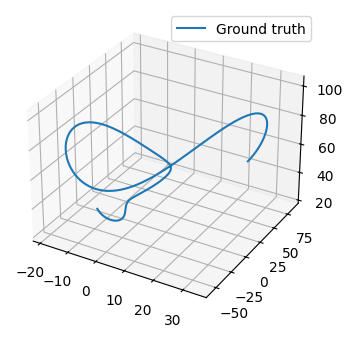

In [3]:
data = lorenz(1000, np.random.normal(scale=100, size=3))
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:, 0], data[:, 1], zs=data[:,2], label='Ground truth')
plt.legend()
plt.draw()
plt.show()

# Generate dataset

In [4]:
def generate_datapoint(time_steps: int, key: jax.Array, dt: float=0.001) -> np.ndarray:
    state = jax.random.normal(key, (3,)) * 100
    data = lorenz(time_steps, state, dt)
    return data + np.random.normal(scale=10, size=data.shape)

In [5]:
N = 10000
for i in tqdm.trange(N):
  # 1001 so we can time-shift labels by 1
  data = generate_datapoint(1001, jax.random.key(i))
  name = f"data/{i}"
  jnp.save(name, data)

100%|██████████| 10000/10000 [00:22<00:00, 437.96it/s]
